# fiducial VVDS, Nov. nights to N536

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from skipper import observe

In [3]:
plt.rcParams['font.size']=20

sys.path.append('../scripts')

import make_pointings
import sigjson_f2021b

import datetime
import pytz

In [7]:
#sigjson_f2021b.write_backupjson ()

In [8]:
ctio = observe.ObservingSite ()

In [10]:
mastercat = sigjson_f2021b.load_mastercat('n536')

In [11]:
datelist_vvdsxmm_n536 = [(2021,11,ix) for ix in np.arange(24,31)]
datelist_vvdsxmm_n536 += [(2021,12,ix) for ix in np.arange(1,5)]
nightslot_vvdsxmm_n536 = [1 for ix in np.arange(24,31)]
nightslot_vvdsxmm_n536 += [1 for ix in np.arange(1,5)]
priorities_n536 = {'VVDSearly':0, 'VVDSlate':1, 'VVDS':1, 'XMM':2}    

datelist_vvdsxmm_n702 =  [(2021,9,ix) for ix in np.arange(10, 14)] 
#datelist_vvdsxmm_n702 += [(2021,11,ix) for ix in np.arange(24,31)]
nightslot_vvdsxmm_n702 = [2 for ix in np.arange(10,14)]
#nightslot_vvdsxmm_n702 += [1 for ix in np.arange(24,31)]
priorities_n702 = {'VVDSearly':0, 'VVDSlate':1,'VVDS':1, 'XMM':2}    

datelist_cosmosgama_n536 = [(2021,12,31), (2021,1,1)]
datelist_cosmosgama_n536 += [(2021,1,ix) for ix in np.arange(3,5)]
datelist_cosmosgama_n536 += [(2021,1,ix) for ix in np.arange(6,8)]
datelist_cosmosgama_n536 += [(2021,1,ix) for ix in np.arange(9,12)]
datelist_cosmosgama_n536 += [(2022,1,ix) for ix in np.arange(25, 32)]
nightslot_cosmosgama_n536 = [2,2]
nightslot_cosmosgama_n536 += [2 for ix in np.arange(3,5)]
nightslot_cosmosgama_n536 += [2 for ix in np.arange(6,8)]
nightslot_cosmosgama_n536 += [2 for ix in np.arange(9,12)]
nightslot_cosmosgama_n536 += [2 for ix in np.arange(25,32)]
priorities_cosmosgama_n536 = {'COSMOS':0, 'GAMA':1}     

In [10]:
print(f'{len(datelist_vvdsxmm_n536)} half-nights in VVDS/XMM N536')
print(f'{len(datelist_vvdsxmm_n702)} half-nights in VVDS/XMM N702')
print(f'{len(datelist_cosmosgama_n536)} half-nights in COSMOS/GAMA N536')


11 half-nights in VVDS/XMM N536
4 half-nights in VVDS/XMM N702
16 half-nights in COSMOS/GAMA N536


In [12]:
datelist_l =  [(2021,9,ix) for ix in np.arange(10, 14)] 
datelist_l += [(2021,11,ix) for ix in np.arange(24,31)]
datelist_l += [(2021,12,ix) for ix in np.arange(1,5)]
datelist_l += [(2021,12,31), (2022,1,1)]
datelist_l += [(2022,1,ix) for ix in np.arange(3,5)]
datelist_l += [(2022,1,ix) for ix in np.arange(6,8)]
datelist_l += [(2022,1,ix) for ix in np.arange(9,12)]
datelist_l += [(2022,1,ix) for ix in np.arange(25, 32)]
nightslot_l = [2 for ix in np.arange(10,14)]
nightslot_l += [1 for ix in np.arange(24,31)] # 0: full, 1: first half, 2: second half
nightslot_l += [1 for ix in np.arange(1,5)]
nightslot_l += [2,2]
nightslot_l += [2 for ix in np.arange(3,5)]
nightslot_l += [2 for ix in np.arange(6,8)]
nightslot_l += [2 for ix in np.arange(9,12)]
nightslot_l += [2 for ix in np.arange(25,32)]
priorities_l = {'VVDS':0, 'XMM':1}     

In [13]:
ctio = observe.ObservingSite ()

In [20]:
night_start, night_end = ctio.get_sunriseset ( 2021, 10, 17 )
obs_start = night_start + 0.5*(night_end-night_start)
obs_end = night_end
illum, maxalt = ctio.track_moon ( obs_start, obs_end )
illum, maxalt

(0.9447040329242349, 55.989946509322124)

In [14]:
moon_stats = np.zeros ( [2, len(datelist_l)] )
for ix in range(len(datelist_l)):
    night_start, night_end = ctio.get_sunriseset ( *datelist_l[ix] )
    if nightslot_l[ix] == 0:
        print('[predict] night slot: Full night')
        obs_start = night_start
        obs_end = night_end
    elif nightslot_l[ix] == 1:
        print('[predict] night slot: First half')
        obs_start = night_start
        obs_end = obs_start + 0.5*(night_end-obs_start)
    else:
        print('[predict] night slot: Second half')
        obs_start = night_start + 0.5*(night_end-night_start)
        obs_end = night_end 
    
    illum, maxalt = ctio.track_moon ( obs_start, obs_end )
    moon_stats[0,ix] = illum
    moon_stats[1,ix] = maxalt

[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
happy new years
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict] night slot: Second half
[predict]

In [15]:
axassn = []
for dx in datelist_l:
    if dx[1] == 9:
        axassn.append(0)
    elif (dx[1]==11) or ((dx[1]==12)and(dx[2]<15)):
        axassn.append(1)
    else:
        axassn.append(2)
axassn = np.asarray(axassn)        

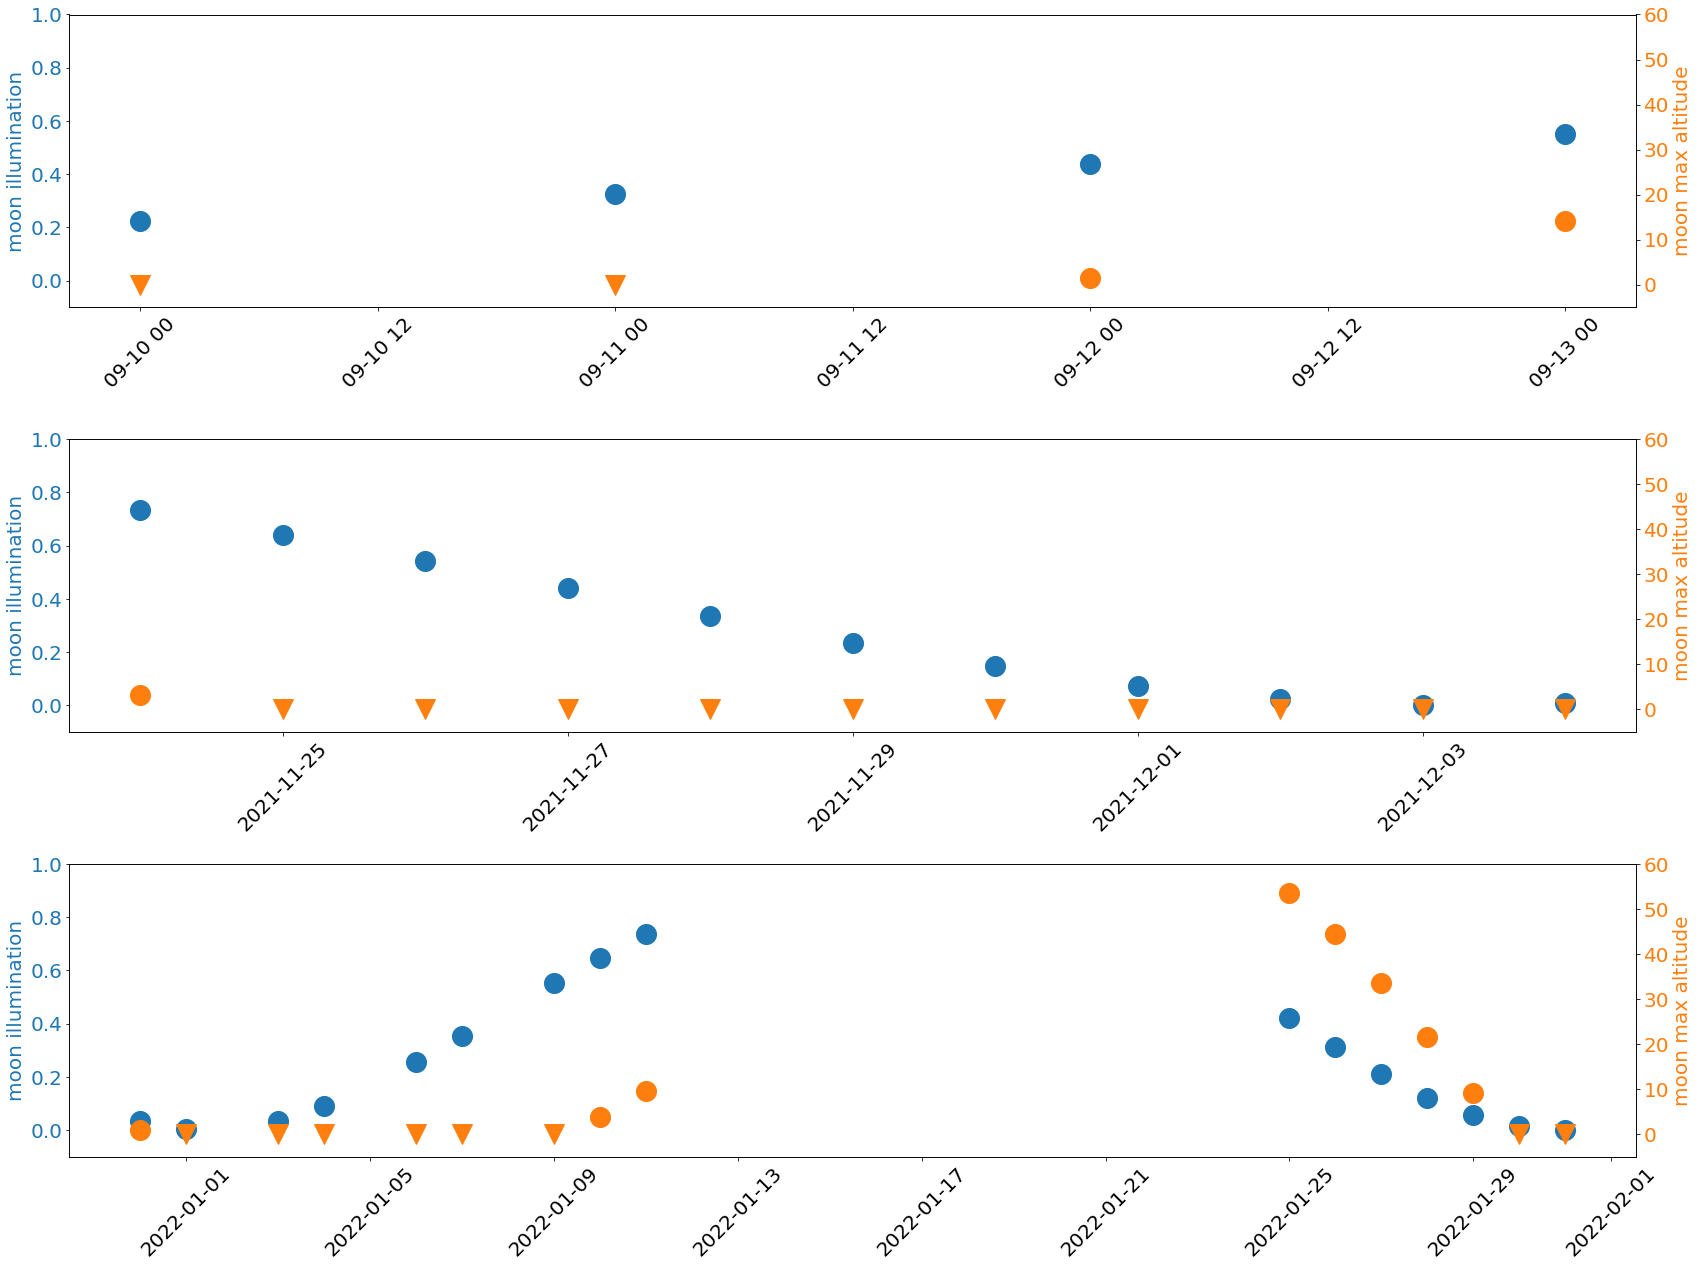

In [16]:
fig, axarr = plt.subplots(3,1,figsize=(24,18))

is_set = moon_stats[1] == 0
for idx in range(len(axarr)):
    ax = axarr[idx]
    
    cdl = np.array(datelist_l)[axassn==idx]
    dplot = np.array([ datetime.datetime(*dx) for dx in cdl])
    ax.plot( dplot, moon_stats[0,axassn==idx], 'o',
           markersize=20)
    
    ax2 = ax.twinx ()
    
    
    ax2.plot ( dplot[~is_set[axassn==idx]], moon_stats[1,(axassn==idx)&~is_set], 
              'o', markersize=20, color='C1', )
    ax2.plot ( dplot[is_set[axassn==idx]], moon_stats[1,(axassn==idx)&is_set], 
              'v', markersize=20, color='C1', )    
    ax.set_ylim(-0.1,1.)
    ax2.set_ylim(-5.,60.)
    ax.tick_params(axis='x', labelrotation = 45)
    ax.tick_params(axis='y', labelcolor='C0')
    ax2.tick_params(axis='y', labelcolor='C1')
    ax.set_ylabel('moon illumination', color='C0')
    ax2.set_ylabel('moon max altitude', color='C1')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/2021B_moonstats.png')

In [48]:
from astropy import table
from astropy.io import fits

In [221]:
coo = observe.CopilotOutput ('/Users/kadofong/Downloads/db_merian.fits')

In [222]:
mastercat = sigjson_s2021a.load_mastercat ()

In [223]:
merian_sidecar = coo.sidecar.loc[np.in1d(coo.sidecar['object'], mastercat.index)]
#merian_sidecar = merian_sidecar.loc[~merian_sidecar.isna().all(axis=1)]

In [224]:
tele = pd.read_csv('/Users/kadofong/Downloads/tele20210317.csv')

In [225]:
has_observed = np.in1d(mastercat['object'], tele['object'])

In [271]:
(has_observed & ~needs_reobservation).sum()

237

In [273]:
has_observed.sum() - 237

29

In [228]:
reobs = coo.flag_for_reobservation ( mastercat )
needs_reobservation = np.in1d(mastercat['object'], reobs)

In [217]:
merian_sidecar = merian_sidecar.loc[~merian_sidecar.sort_values('t_eff')['object'].duplicated(keep='last')]
print(len(merian_sidecar.loc[merian_sidecar['t_eff']<min_teff, 'object'].values))
merian_sidecar.loc[merian_sidecar['t_eff']<min_teff, 'object'].values

29


array(['GAMA_J084418.40-003925.58_N708', 'GAMA_J102228.49-005439.00_N708',
       'GAMA_J102338.37-005920.28_N708', 'GAMA_J085651.71+040203.43_N708',
       'GAMA_J085946.03+040910.61_N708', 'GAMA_J090056.98+040524.75_N708',
       'GAMA_J090208.15+040302.22_N708', 'GAMA_J090319.31+040038.47_N708',
       'GAMA_J091608.08+022837.50_N708', 'GAMA_J091718.60+022438.08_N708',
       'GAMA_J091829.52+022207.93_N708', 'GAMA_J091940.44+021936.67_N708',
       'GAMA_J092235.62+022659.62_N708', 'GAMA_J092346.11+022255.18_N708',
       'GAMA_J093853.75+004650.42_N708', 'GAMA_J094114.60+003954.73_N708',
       'GAMA_J094225.30+003714.31_N708', 'GAMA_J094527.92+004523.22_N708',
       'GAMA_J094748.74+003820.74_N708', 'GAMA_J101214.33+003930.78_N708',
       'GAMA_J102707.76+003149.64_N708', 'GAMA_J102818.44+002856.00_N708',
       'GAMA_J102929.10+002601.74_N708', 'GAMA_J114848.61-005955.71_N708',
       'GAMA_J114958.62-010456.15_N708', 'GAMA_J090613.68+040741.72_N708',
       'GAMA_J091614.44+0

In [199]:
merian_sidecar.loc[~merian_sidecar.sort_values('t_eff')['object'].duplicated(keep='last'), 't_eff object'.split()].loc[1]

t_eff                                601
object    GAMA_J102929.10+002601.74_N708
Name: 1, dtype: object

In [197]:
merian_sidecar.loc[merian_sidecar.sort_values('t_eff')['object'].duplicated(keep='last'), 't_eff object'.split()]

,t_eff,object
56385,178.038750,GAMA_J102929.10+002601.74_N708
56387,238.119006,GAMA_J113728.39-011039.32_N708


In [184]:
merian_sidecar.loc[1] = merian_sidecar.loc[56385].copy()
merian_sidecar.loc[1, 't_eff'] = 601

/Users/kadofong/env3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kadofong/env3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
sigjson_f2021b.plan_tomorrow ( 10, 9, 2021, '/Users/kadofong/Downloads/tele20210317.csv' )

On 2021/9/10, we are observing VVDSXMM in n702
We are observing the second half of the night
[predict] night slot: Second half
obsStart: 2021/09/11 01:40 AM Santiago
          2021/09/11 12:40 AM ET
          2021/09/11 04:40 AM UTC
obsEnd:   2021/09/11 06:45 AM Santiago
          2021/09/11 05:45 AM ET
          2021/09/11 09:45 AM UTC
Minimum airmass available: 1.169890196485967

==> 20210911_04, 1200.0000000000086s available
1200.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
[to_json] Inserting 60s focus exposures
[to_json] Inserting CheckSky 60s exposures
QA COMPLETE: All tests passed
Minimum airmass available: 1.170375046477945

==> 20210911_05, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
[to_json] Inserting 60s focus exposures
[to_json] Big slew from VVDSearly_J225356.44+010804.19_N70 to VVDSearly_J000343.95+005959.52_N70
QA COMPLETE: Al

,is_queued,qstamp,has_priority,airmass
object.1,,,,
VVDS_J223622.10+005603.00_N70,False,NaN,0.0,NaN
VVDS_J223731.99+010050.17_N70,False,NaN,0.0,NaN
VVDS_J223842.58+010345.97_N70,False,NaN,0.0,NaN
VVDS_J223953.17+010642.32_N70,False,NaN,0.0,NaN
VVDS_J235616.04+005959.52_N70,True,20210911_07,1.0,1.3966325000424558
VVDS_J235726.06+010459.63_N70,True,20210911_07,1.0,1.39346465422275
VVDS_J235836.72+010759.80_N70,True,20210911_07,1.0,1.3897256699894602
VVDS_J235947.39+011059.87_N70,True,20210911_07,1.0,1.3860443049795965
VVDS_J234848.61+005955.71_N70,False,NaN,1.0,NaN


In [30]:
iqt_n536 = sigjson_f2021b.predict_f2021b ( 'n536', datelist_vvdsxmm_n536, 
                                          nightslot_vvdsxmm_n536,
                                          priorities=priorities_n536,
                                          pad_last_hour=False)

[predict] night slot: First half
obsStart: 2021/11/24 09:36 PM Santiago
          2021/11/24 07:36 PM ET
          2021/11/25 12:36 AM UTC
obsEnd:   2021/11/25 01:30 AM Santiago
          2021/11/24 11:30 PM ET
          2021/11/25 04:30 AM UTC
Minimum airmass available: 1.1702371737988073

==> 20211125_00, 1440.000000000003s available
900.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1416324662291732

==> 20211125_01, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1018997024974224

==> 20211125_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1092686168609853

==> 20211125_03, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s fill

Minimum airmass available: 1.1794398532291834

==> 20211201_03, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
Minimum airmass available: 1.3187503856694007

==> 20211201_04, 1919.9999999999802s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
1800.0s filled by priority=2.0 objects
[predict] night slot: First half
obsStart: 2021/12/01 09:43 PM Santiago
          2021/12/01 07:43 PM ET
          2021/12/02 12:43 AM UTC
obsEnd:   2021/12/02 01:32 AM Santiago
          2021/12/01 11:32 PM ET
          2021/12/02 04:32 AM UTC
Minimum airmass available: 1.2079581487987472

==> 20211202_00, 1020.0000000000044s available
900.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1267279333135765

==> 20211202_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 obje

/Users/kadofong/work/merian/skipper/python/skipper/observe.py:387: UserWarning: Queue empty at 20211205_04
  warnings.warn (f'Queue empty at {hstr}')


In [18]:
iqt_n702 = sigjson_f2021b.predict_f2021b ( 'n702', 
                                          datelist_vvdsxmm_n702, 
                                          nightslot_vvdsxmm_n702,
                                          priorities=priorities_n702,
                                          pad_last_hour=False)

[predict] night slot: Second half
obsStart: 2021/09/11 01:40 AM Santiago
          2021/09/11 12:40 AM ET
          2021/09/11 04:40 AM UTC
obsEnd:   2021/09/11 06:45 AM Santiago
          2021/09/11 05:45 AM ET
          2021/09/11 09:45 AM UTC
Minimum airmass available: 1.169890196485967

==> 20210911_04, 1200.0000000000086s available
1200.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.170375046477945

==> 20210911_05, 3600.0s available
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1351914641225473

==> 20210911_06, 3600.0s available
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1015408234261475

==> 20210911_07, 3600.0s available
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
Minimum airmass available: 1.1124556110470594

==> 20210911_08, 3600.0s available
0.0s filled by priority=1.0 object

In [19]:
iqt_cosmosgama_n536 = sigjson_f2021b.predict_f2021b ( 'n536', datelist_cosmosgama_n536, 
                                          nightslot_cosmosgama_n536,
                                          priorities=priorities_cosmosgama_n536,
                                          field="COSMOSGAMA",
                                          pad_last_hour=False)

happy new years
[predict] night slot: Second half
obsStart: 2022/01/01 01:47 AM Santiago
          2021/12/31 11:47 PM ET
          2022/01/01 04:47 AM UTC
obsEnd:   2022/01/01 05:33 AM Santiago
          2022/01/01 03:33 AM ET
          2022/01/01 08:33 AM UTC
Minimum airmass available: 1.3565391518090852
(780s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.2020399100395025

==> 20220101_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1503984295041028

==> 20220101_06, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.1448641031436997

==> 20220101_07, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.1430156924382786

==> 20220101_08, 1979.9999999999704s available
1800s filled by priority=0.0 objects
0s filled by priority=1.0 objects
[predict] night 

Minimum airmass available: 1.1471235583756207

==> 20210112_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1554036979797624

==> 20210112_07, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1448553155869192

==> 20210112_08, 2579.9999999999586s available
0s filled by priority=0.0 objects
1800s filled by priority=1.0 objects
[predict] night slot: Second half
obsStart: 2022/01/26 01:55 AM Santiago
          2022/01/25 11:55 PM ET
          2022/01/26 04:55 AM UTC
obsEnd:   2022/01/26 05:57 AM Santiago
          2022/01/26 03:57 AM ET
          2022/01/26 08:57 AM UTC
Minimum airmass available: 1.199164046559801
(270s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.151269772146353

==> 20220126_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.16150

In [20]:
mastercat_n536 = sigjson_f2021b.load_mastercat ('n536')
mastercat_n702 = sigjson_f2021b.load_mastercat ('n702')
mastercat_cosmosgama = sigjson_f2021b.load_mastercat_cosmos ()

In [21]:
plt.rcParams['font.size'] = 15

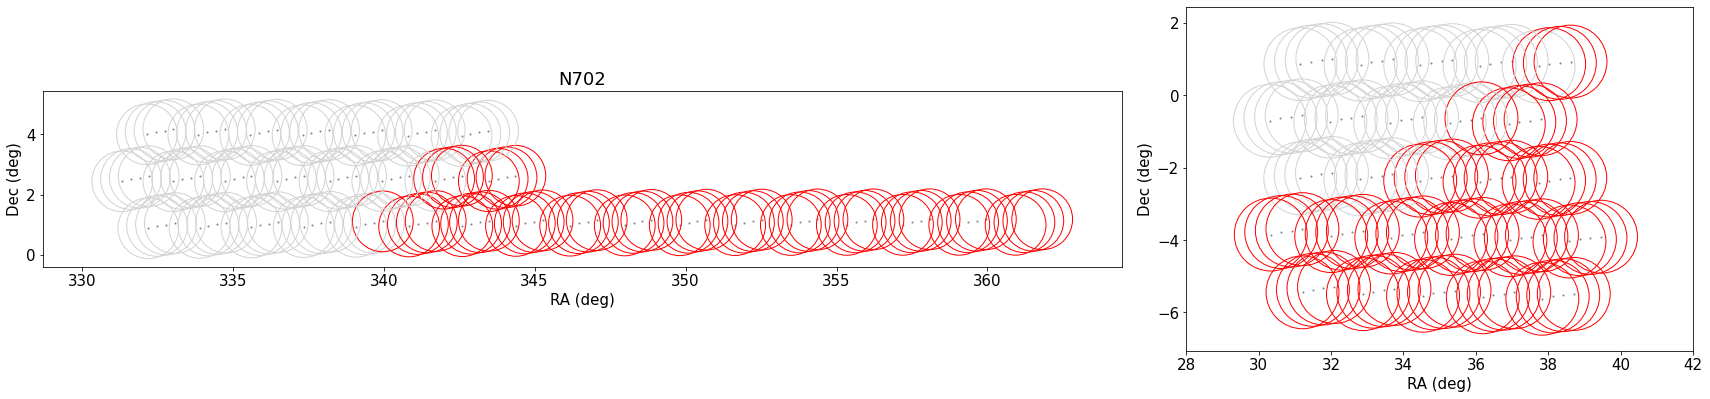

In [22]:
fig = plt.figure(figsize=(24,8))
fov_radius = (3.18/np.pi)**0.5
shp = (1,3)
ax0 = plt.subplot2grid(shp, (0,0), colspan=2)
ax1 = plt.subplot2grid(shp, (0,2) )
for name,row in mastercat_n702.iterrows():
    qrow = iqt_n702.loc[name]
    if (row.RA > 50):
        ax = ax0
        ra = row.RA
    elif row.RA < 10:
        ax = ax0
        ra = row.RA + 360.
    else:
        ax = ax1
        ra = row.RA
    if qrow.is_queued:
        cval = np.where(iqt_n702.sort_values('qstamp').index == name)[0][0]
        ec= 'r' #plt.cm.magma( cval/iqt_n702.shape[0] )
    else:
        ec='lightgray'
    patch = patches.Circle ( (ra, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)

mask = (mastercat.RA > 50)
ax0.scatter(mastercat.loc[mask,'RA'], mastercat.loc[mask,'dec'], s=1, color='grey')
ax0.set_aspect('equal')
ax1.scatter(mastercat.loc[~mask,'RA'], mastercat.loc[~mask,'dec'], s=1, color='grey')
ax1.set_xlim(28.,42.)
ax1.set_aspect('equal')
ax0.set_title('N702')

for ax in [ax0,ax1]:
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')
plt.tight_layout ()
#plt.savefig('/Users/kadofong/Downloads/n702_map.png')

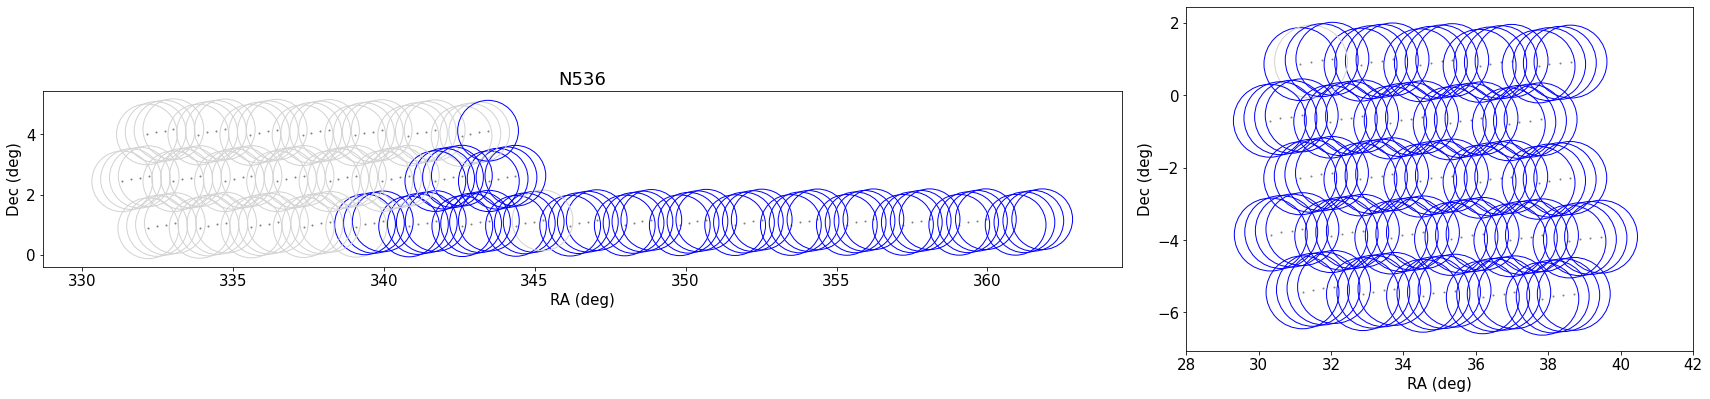

In [31]:
fig = plt.figure(figsize=(24,8))
fov_radius = (3.18/np.pi)**0.5
shp = (1,3)
ax0 = plt.subplot2grid(shp, (0,0), colspan=2)
ax1 = plt.subplot2grid(shp, (0,2) )
for name,row in mastercat_n536.iterrows():
    qrow = iqt_n536.loc[name]
    if (row.RA > 50):
        ax = ax0
        ra = row.RA
    elif row.RA < 10:
        ax = ax0
        ra = row.RA + 360.
    else:
        ax = ax1
        ra = row.RA
    if qrow.is_queued:
        cval = np.where(iqt_n536.sort_values('qstamp').index == name)[0][0]
        ec= 'b'#plt.cm.viridis( cval/iqt_n536.shape[0] )
    else:
        ec='lightgray'
    patch = patches.Circle ( (ra, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)

mask = (mastercat.RA > 50)
ax0.scatter(mastercat.loc[mask,'RA'], mastercat.loc[mask,'dec'], s=1, color='grey')
ax0.set_aspect('equal')
ax1.scatter(mastercat.loc[~mask,'RA'], mastercat.loc[~mask,'dec'], s=1, color='grey')
ax1.set_xlim(28.,42.)
ax1.set_aspect('equal')
ax0.set_title('N536')
for ax in [ax0,ax1]:
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')
plt.tight_layout ()
#plt.savefig('/Users/kadofong/Downloads/n536_map.png')

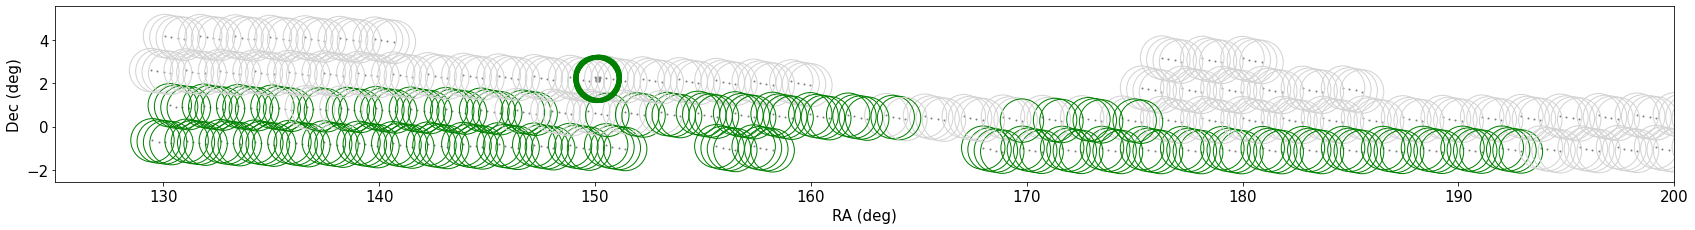

In [24]:
fig = plt.figure(figsize=(24,8))
fov_radius = (3.18/np.pi)**0.5

ax = plt.subplot(111)

for name,row in mastercat_cosmosgama.iterrows():
    qrow = iqt_cosmosgama_n536.loc[name]
    if qrow.is_queued:
        cval = np.where(iqt_cosmosgama_n536.sort_values('qstamp').index == name)[0][0]
        ec= 'green' #plt.cm.viridis( cval/iqt_cosmosgama_n536.query('is_queued').shape[0] )
    else:
        ec='lightgray'
    patch = patches.Circle ( (row.RA, row.dec), fov_radius, ec=ec, #plt.cm.viridis((hr+5)/10.), 
                            fc='None')
    
    ax.add_patch(patch)



ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')
ax.scatter ( mastercat_cosmosgama['RA'], mastercat_cosmosgama['dec'], s=1, color='grey' )
ax.set_xlim(125,200)

ax.set_aspect('equal')
plt.tight_layout ()
#plt.savefig('/Users/kadofong/Downloads/n536_map.png')

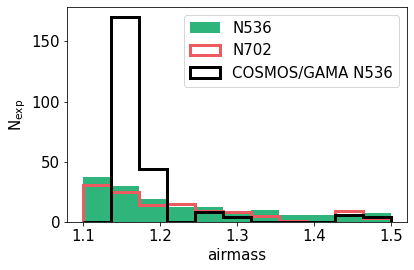

In [25]:
bins = np.linspace(1.1,1.5,12)
plt.hist(iqt_n536.airmass.astype(float), bins=bins,
         color=plt.cm.viridis(0.65), label='N536')
plt.hist(iqt_n702.airmass.astype(float), bins=bins,
         color=plt.cm.magma(0.65), histtype='step', lw=3, label='N702')
plt.hist(iqt_cosmosgama_n536.airmass.astype(float), bins=bins,
         color='k', histtype='step', lw=3, label='COSMOS/GAMA N536')
plt.legend()
plt.xlabel('airmass')
plt.ylabel(r'N$_{\rm exp}$')
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/airmass.png')

In [26]:
print(f"{iqt_cosmosgama_n536.query('is_queued').shape[0]} exposures queued for COSMOS/GAMA N536")
print(f"{iqt_n536.query('is_queued').shape[0]} exposures queued for VVDS/XMM N536")
print(f"{iqt_n702.query('is_queued').shape[0]} exposures queued for VVDS/XMM N702")
ntot = iqt_cosmosgama_n536.query('is_queued').shape[0]
ntot += iqt_n536.query('is_queued').shape[0]
ntot += iqt_n702.query('is_queued').shape[0]
print('--------------------')
print(f'{ntot} exposures queued in total')

236 exposures queued for COSMOS/GAMA N536
150 exposures queued for VVDS/XMM N536
120 exposures queued for VVDS/XMM N702
--------------------
506 exposures queued in total
